In [1]:
from sentence_transformers import SentenceTransformer
from semnet import SemanticNetwork
import networkx as nx
import matplotlib.pyplot as plt

docs = [
    "Tony Blair",
    "Anthony Blair",
    "Sir Tony Blair",
    "President Obama",
    "Barack Obama",
    "Donald J. Trump",
    "Donald Trump",
    "The Donald",
    "Joe Biden",
    "Joseph Biden",
    "Elon Musk",
]

embedding_model = SentenceTransformer("BAAI/bge-base-en-v1.5")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

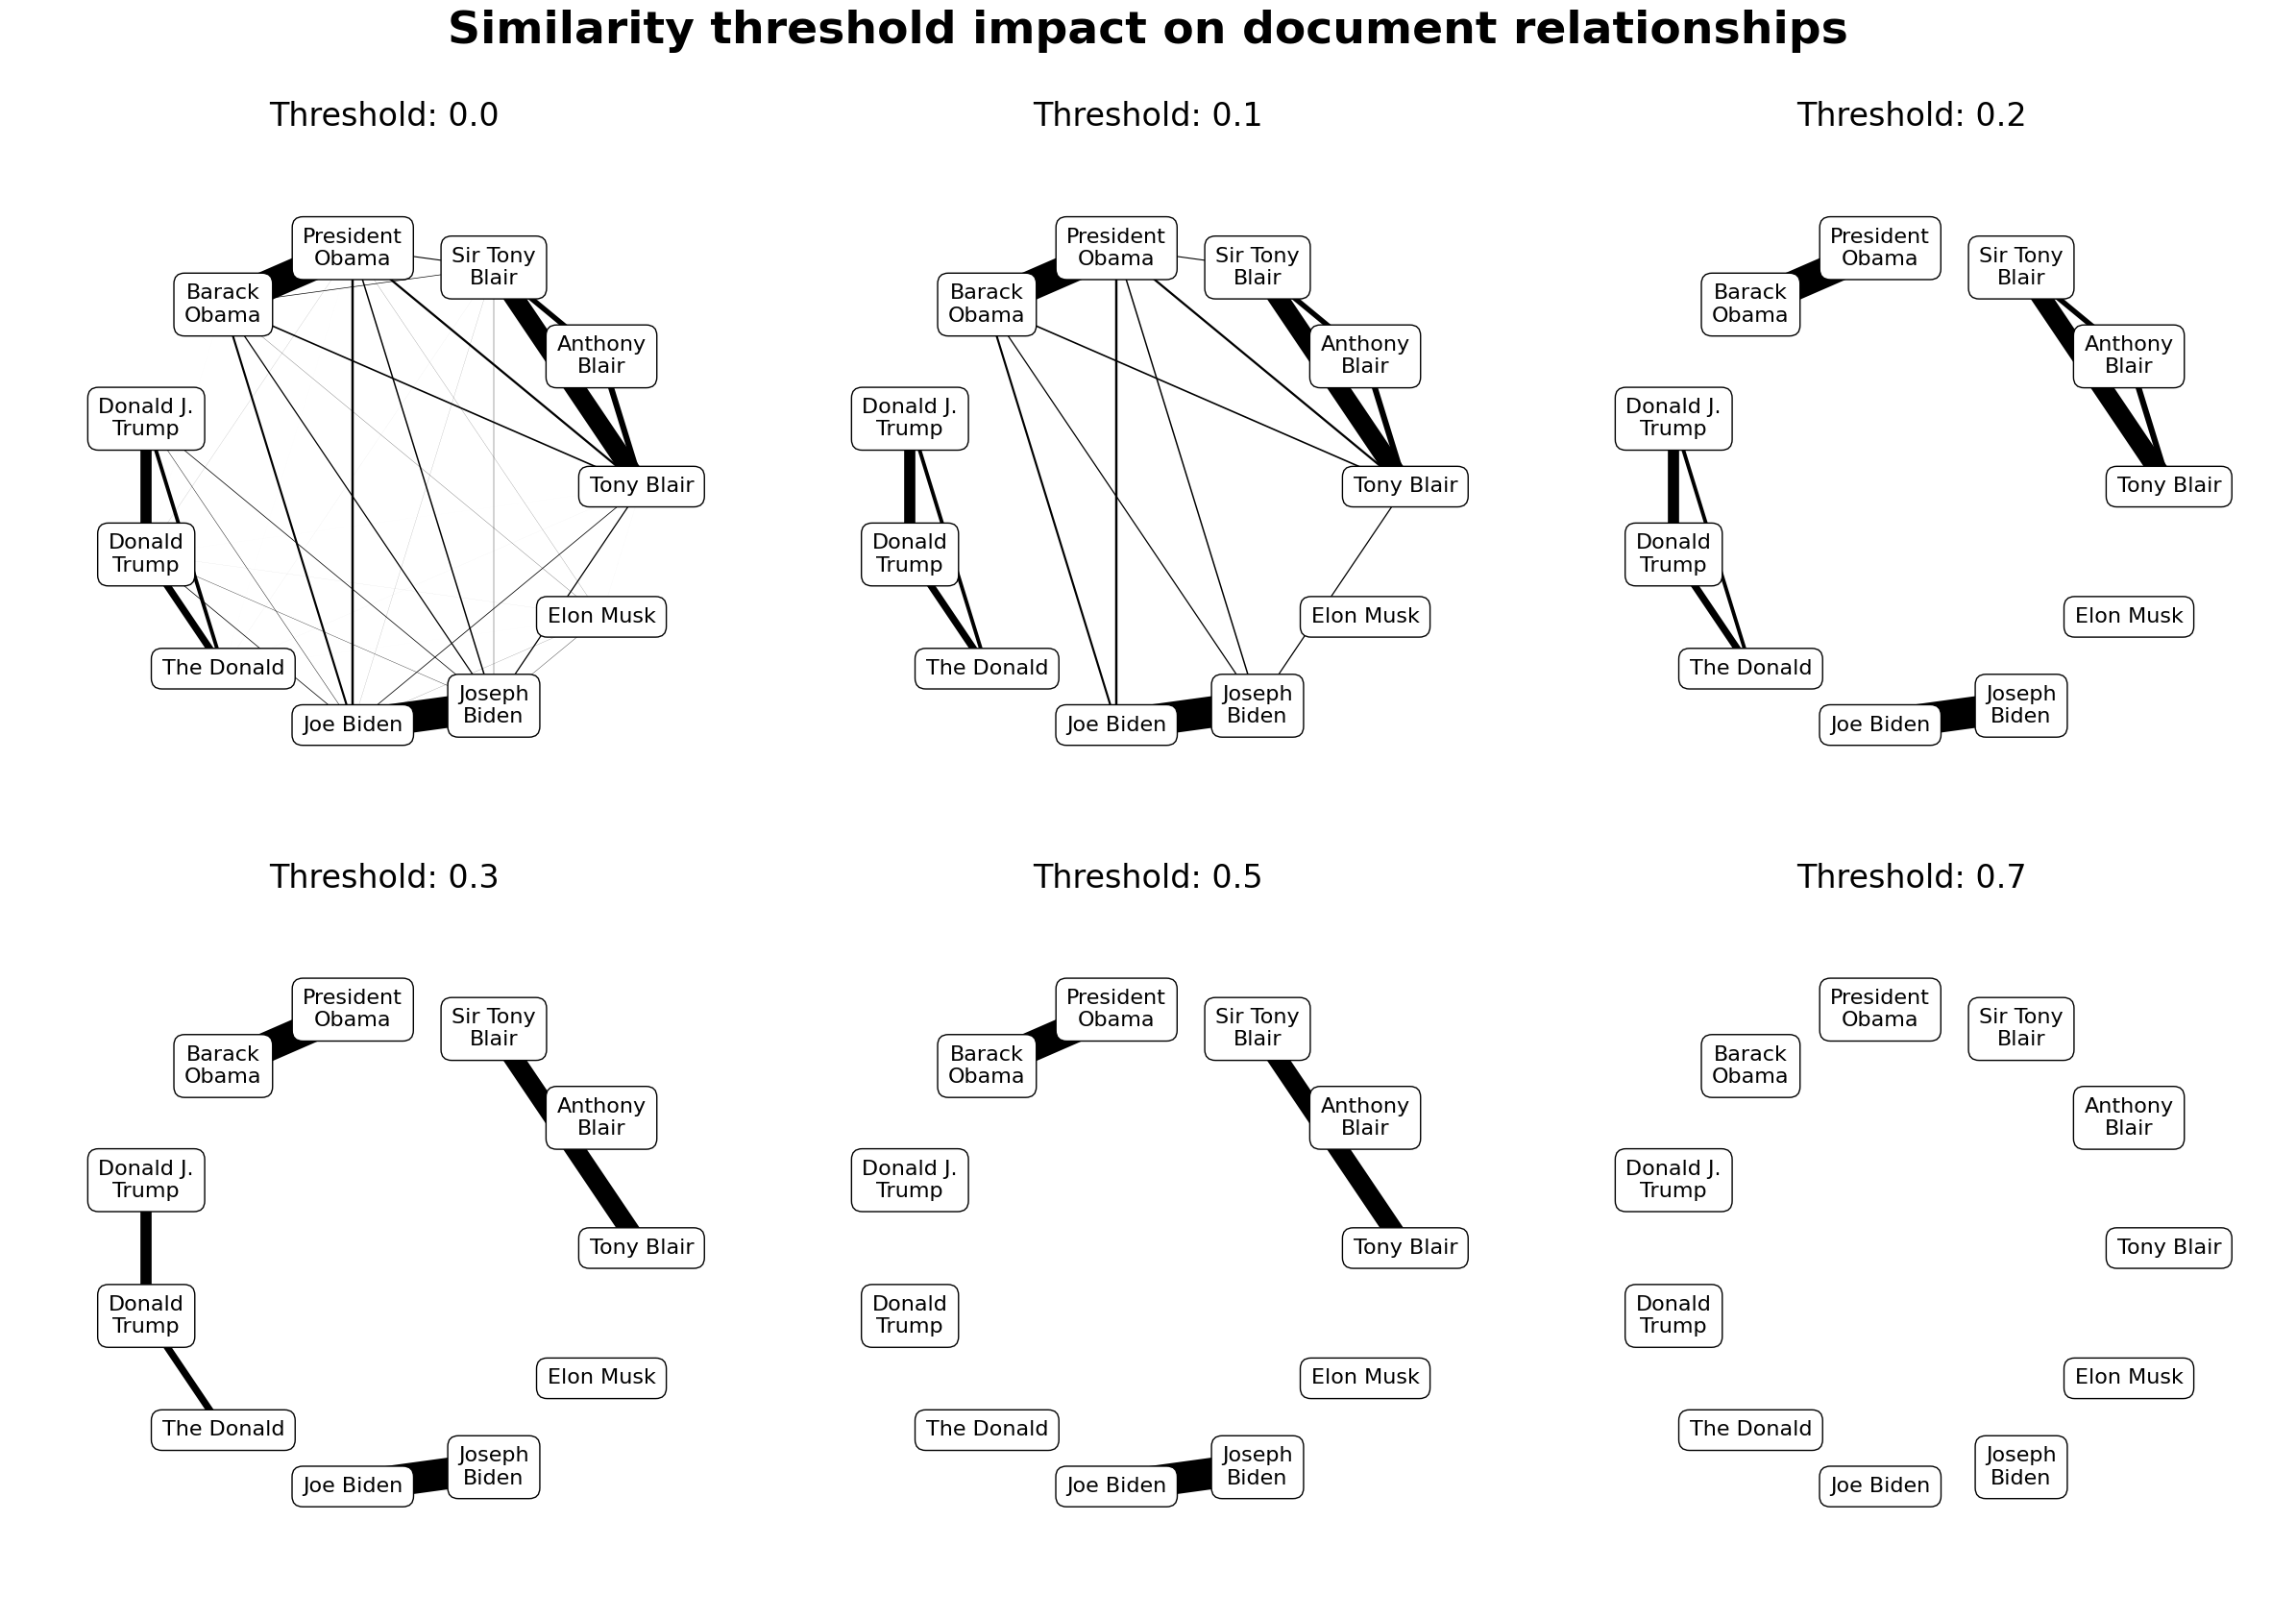

In [2]:
import textwrap

fig, ax = plt.subplots(2, 3, figsize=(24, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Add spacing between subplots

thresholds = [0, 0.1, 0.2, 0.3, 0.5, 0.7]

for thresh, ax in zip(thresholds, ax.flatten()):
    semnet = SemanticNetwork(thresh=thresh)
    G = semnet.fit_transform(embeddings, labels=docs)

    # Circular layout, only draw once
    if thresh == thresholds[0]:
        pos = nx.circular_layout(G, scale=0.7)  # Make circle smaller

    ax.set_title(f"Threshold: {thresh:.1f}", fontsize=24)

    labels = {}
    for i, doc in enumerate(docs):
        labels[i] = "\n".join(textwrap.wrap(doc, width=10))

    nx.draw(
        G,
        with_labels=True,
        labels=labels,
        ax=ax,
        pos=pos,
        node_size=0,
        font_size=16,
        bbox=dict(
            facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"
        ),
        width=[
            (edge["weight"] * 7.5) ** 2 for _, _, edge in G.edges(data=True)
        ],
        edge_color="black",
    )
    ax.set_ylim(-1.05, 1.025)
    ax.set_xlim(-1.05, 1.025)

fig.tight_layout()
fig.suptitle(
    "Similarity threshold impact on document relationships",
    fontsize=34,
    fontweight="bold",
    y=1.05,
)

fig.savefig(
    "../img/semantic_network_thresholds.png", dpi=300, bbox_inches="tight"
)

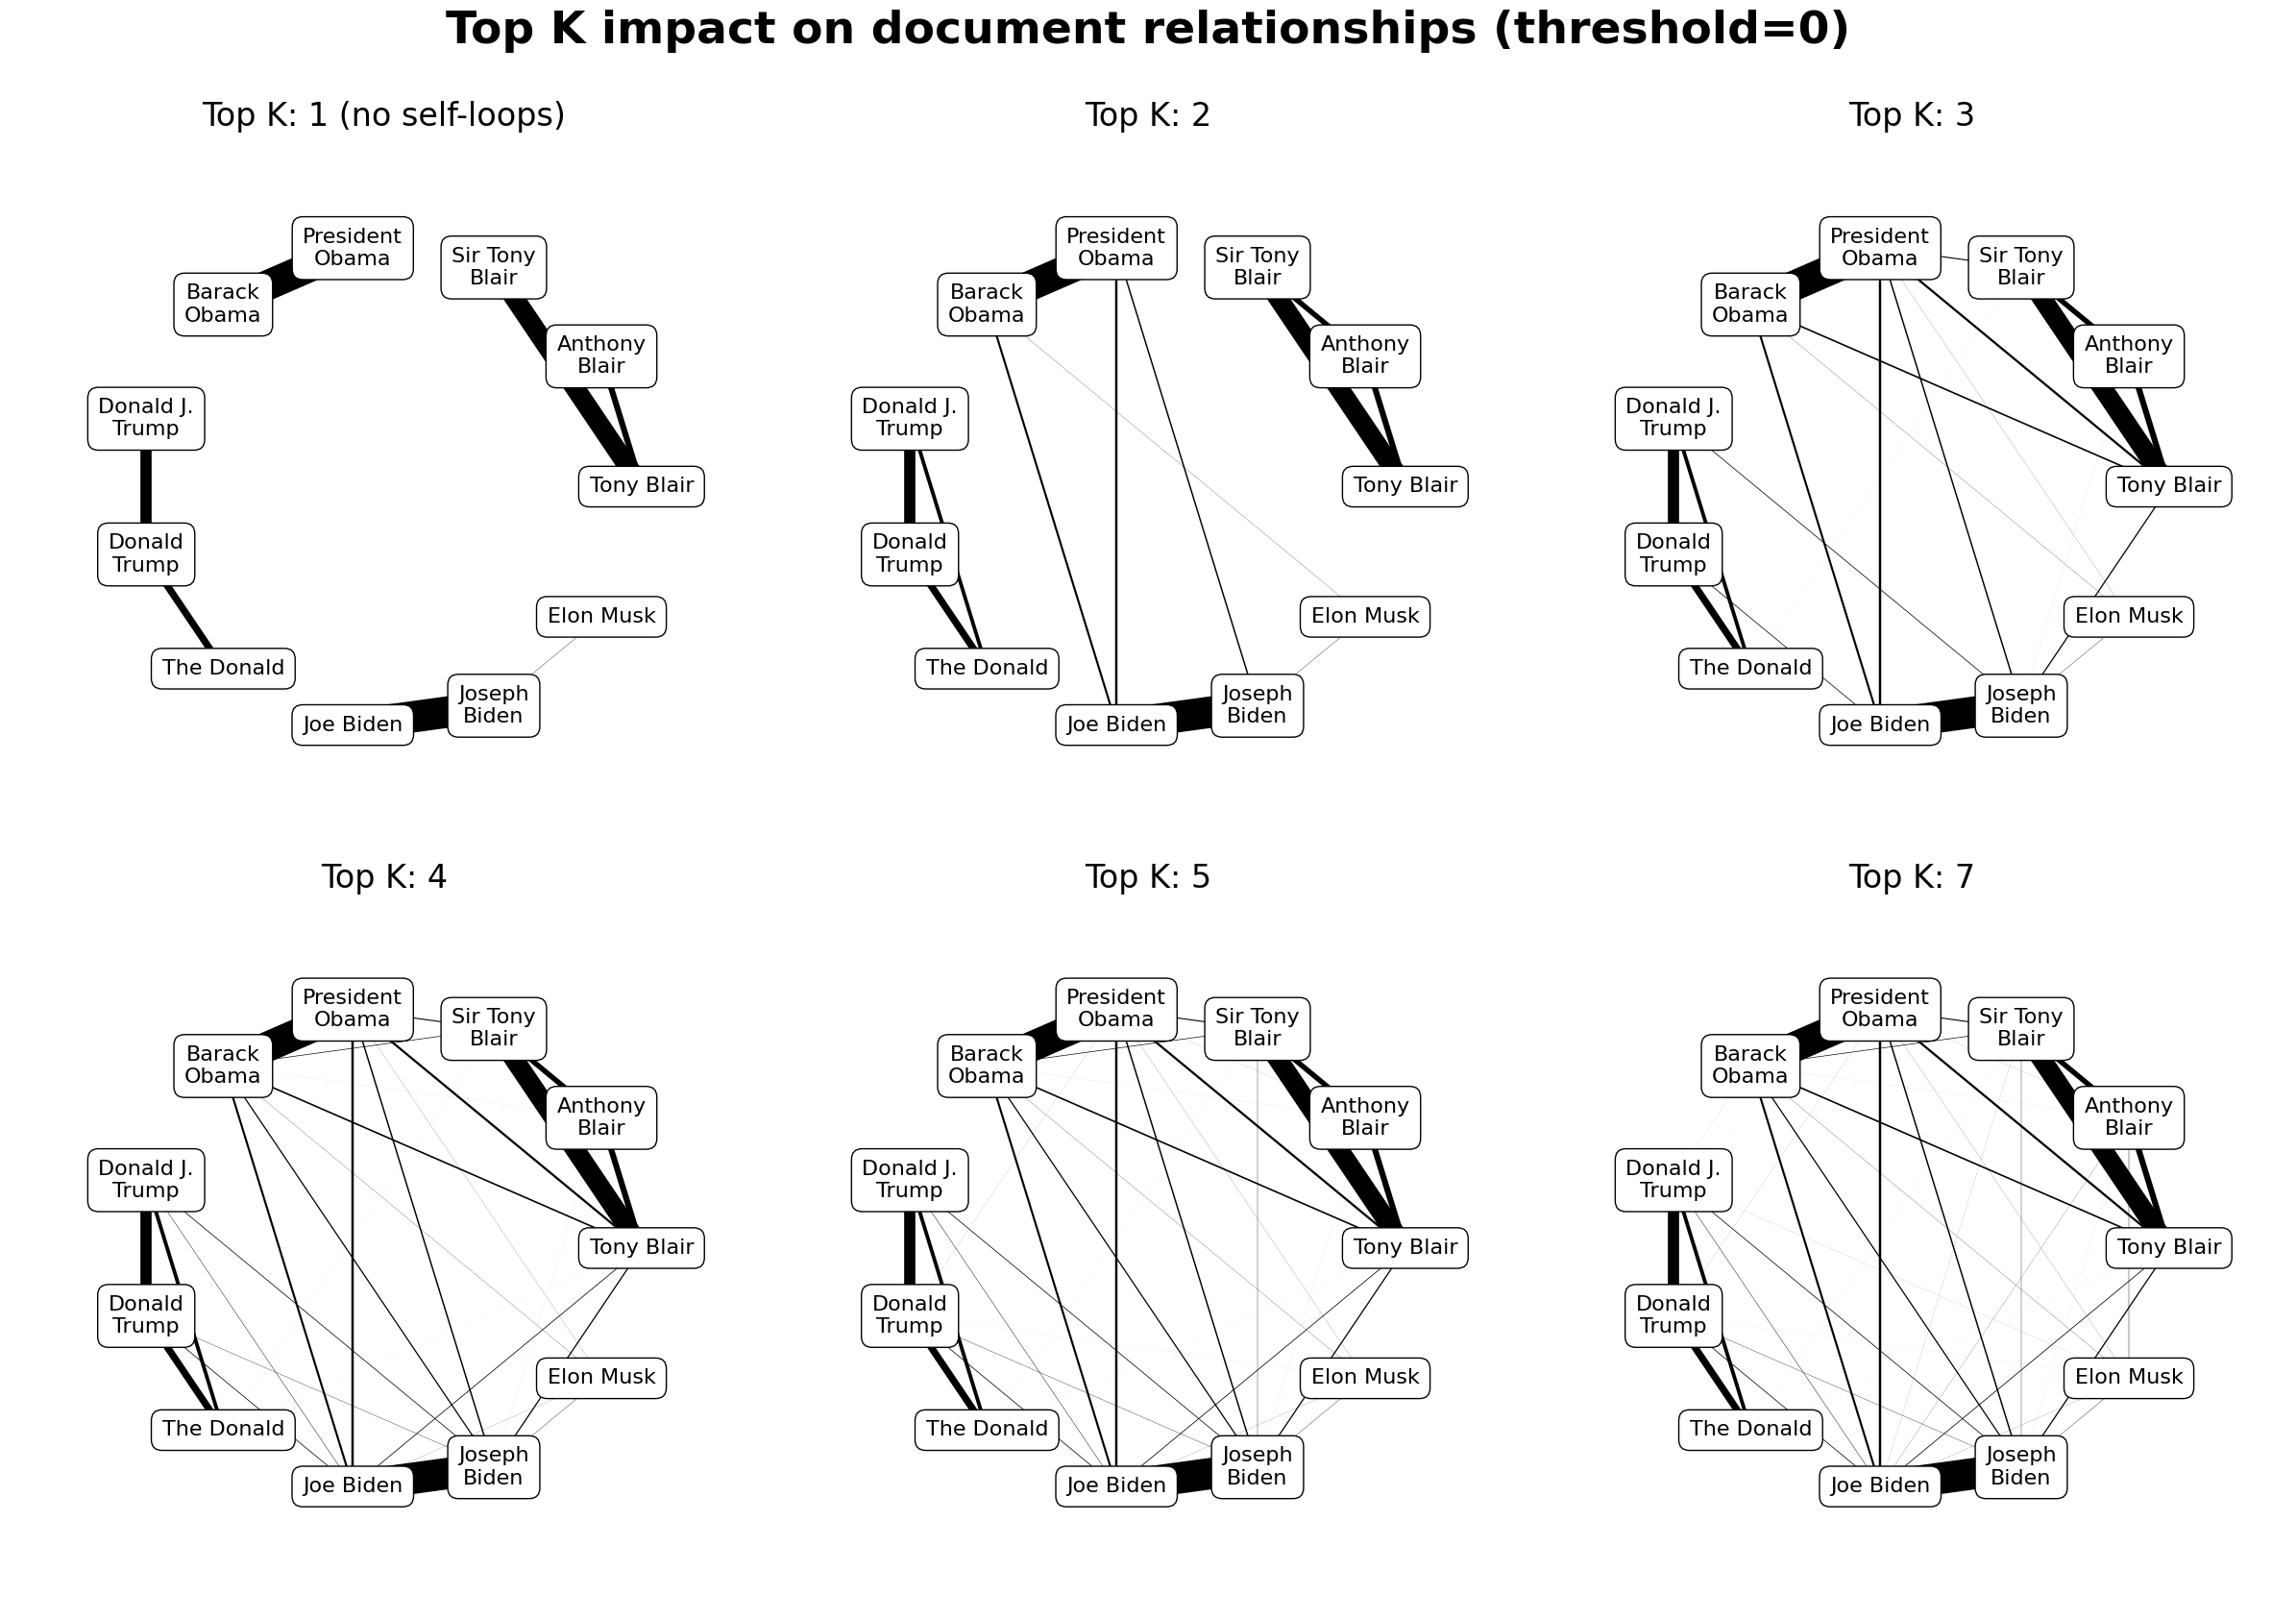

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(24, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Add spacing between subplots

top_k_values = [1, 2, 3, 4, 5, 7, 10]

for top_k, ax in zip(top_k_values, ax.flatten()):
    semnet = SemanticNetwork(top_k=top_k, thresh=-1)
    G = semnet.fit_transform(embeddings, labels=docs)

    # Circular layout, only draw once
    if top_k == top_k_values[0]:
        pos = nx.circular_layout(G, scale=0.7)  # Make circle smaller

        ax.set_title(f"Top K: {top_k} (no self-loops)", fontsize=24)

    else:
        ax.set_title(f"Top K: {top_k}", fontsize=24)

    labels = {}
    for i, doc in enumerate(docs):
        labels[i] = "\n".join(textwrap.wrap(doc, width=10))

    nx.draw(
        G,
        with_labels=True,
        labels=labels,
        ax=ax,
        pos=pos,
        node_size=0,
        font_size=16,
        bbox=dict(
            facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"
        ),
        width=[
            (edge["weight"] * 7.5) ** 2 for _, _, edge in G.edges(data=True)
        ],
        edge_color="black",
    )
    ax.set_ylim(-1.05, 1.025)
    ax.set_xlim(-1.05, 1.025)

fig.tight_layout()
fig.suptitle(
    "Top K impact on document relationships (threshold=0)",
    fontsize=34,
    fontweight="bold",
    y=1.05,
)

fig.savefig("../img/semantic_network_top_k.png", dpi=300, bbox_inches="tight")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

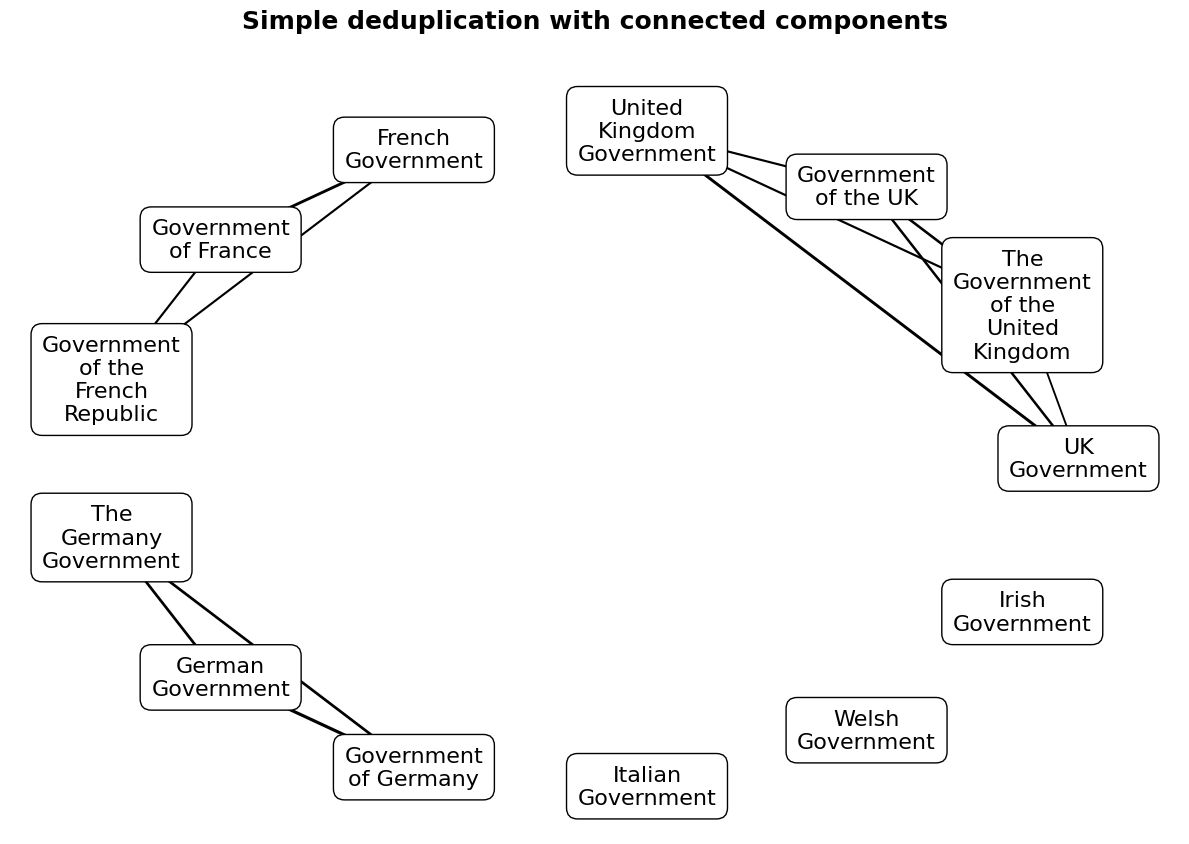

In [30]:
docs = [
    "UK Government",
    "The Government of the United Kingdom",
    "Government of the UK",
    "United Kingdom Government",
    "French Government",
    "Government of France",
    "Government of the French Republic",
    "The Germany Government",
    "German Government",
    "Government of Germany",
    "Italian Government",
    "Welsh Government",
    "Irish Government",
]

embeddings = embedding_model.encode(docs, show_progress_bar=True)

semnet = SemanticNetwork(top_k=len(docs), thresh=0.5)
G = semnet.fit_transform(embeddings, labels=docs)
pos = nx.circular_layout(G, scale=1)


fig, ax = plt.subplots(figsize=(12, 8))
labels = {}
for i, doc in enumerate(docs):
    labels[i] = "\n".join(textwrap.wrap(doc, width=10))

nx.draw(
    G,
    with_labels=True,
    labels=labels,
    ax=ax,
    pos=pos,
    node_size=0,
    font_size=16,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
    width=[(edge["weight"] * 2) ** 2 for _, _, edge in G.edges(data=True)],
    edge_color="black",
)

fig.tight_layout()
fig.suptitle(
    "Simple deduplication with connected components",
    fontsize=18,
    fontweight="bold",
    y=1.05,
)
plt.savefig(
    "../img/semantic_network_deduplication.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [1]:
from sklearn.metrics import DistanceMetric
import numpy as np

dist = DistanceMetric.get_metric("euclidean")

# Generate 10_000 random embeddings
embeddings = np.random.rand(100_000, 768)
dist_scores = dist.pairwise(embeddings)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

In [ ]:
from semnet import SemanticNetwork
import time

# Kick off timer again
start_time = time.time()

# Make 100,000 copies this time
embeddings = np.random.rand(100_000, 768)

# Build semantic network
semnet = SemanticNetwork(thresh=0.4, top_k=5)
G = semnet.fit_transform(embeddings)

# Close off the timer
end_time = time.time()
print(f"Processing time: {end_time - start_time:.2f} seconds")

NameError: name 'time' is not defined

In [37]:
# generate 10000 random embeddings
import numpy as np

mock_embs = embedding_model.encode(docs * 10, show_progress_bar=True)

# randomly perturb embeddings
np.random.seed(42)
perturbations = np.random.normal(-1, 1, mock_embs.shape)
embeddings = mock_embs + perturbations

# Step thresholds to 100

# Thresholds from 0 to 1
thresholds = np.linspace(0, 0.5, 25)
top_ks = np.arange(1, 101, 5).astype(int)

# build scatter data
data = []
for thresh in thresholds:
    for top_k in top_ks:
        semnet = SemanticNetwork(thresh=thresh, top_k=top_k)
        G = semnet.fit_transform(embeddings)
        data.append((thresh, top_k, G.number_of_edges()))

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import numpy as np

x = semnet.index_.get_nns_by_item(0, 4, include_distances=True)
y = (
    np.array(x[0][1:]),
    np.array(x[1][1:]),
)
print(x)
print(y)

([0, 2, 1, 3], [0.0, 0.489918053150177, 0.7190965414047241, 0.8295320272445679])
(array([2, 1, 3]), array([0.48991805, 0.71909654, 0.82953203]))


In [2]:
n = 100000
pairs = n * (n - 1) // 2
print(f"Number of documents: {n:,}")
print(f"Number of possible pairs: {pairs:,}")

Number of documents: 100,000
Number of possible pairs: 4,999,950,000


In [12]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import time

start_time = time.time()
for source, target in combinations(range(10000), 2):
    source_embedding = embeddings[source].reshape(1, -1)
    target_embedding = embeddings[target].reshape(1, -1)
    sim = cosine_similarity(source_embedding, target_embedding)
end_time = time.time()
print(f"Processing time: {end_time - start_time:.2f} seconds")

KeyboardInterrupt: 

In [4]:
import numpy as np
import time

times = []

sizes = [10, 100, 1000, 10_000, 100_000, 1_000_000]

# Embed a single text
text = "I feel the need, the need for speed"
embedding = embedding_model.encode([text])[0]

for size in sizes:
    # Start time
    start_time = time.time()

    # Make 100,000 copies of the embedding with slight variations
    variations = np.random.normal(size=(size, embedding.shape[0]))
    embeddings = embedding + variations * 0.01

    # Build semantic network
    semnet = SemanticNetwork(thresh=0.4, top_k=5)
    G = semnet.fit_transform(embeddings)

    end_time = time.time()
    print(
        f"Processed {size} embeddings in time: {end_time - start_time:.2f} seconds"
    )
    times.append(end_time - start_time)

Processed 10 embeddings in time: 0.22 seconds
Processed 100 embeddings in time: 0.02 seconds
Processed 1000 embeddings in time: 0.26 seconds
Processed 10000 embeddings in time: 3.46 seconds
Processed 100000 embeddings in time: 39.33 seconds
Processed 1000000 embeddings in time: 448.76 seconds
